<a href="https://colab.research.google.com/github/gpava/Analisis_Numerico/blob/main/EDO_Primer_Orden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuaciones Diferenciales Ordinarias de Primer Orden con Python

Solución analítica y numérica de EDOs de primer orden, y algunas de sus aplicaciones prácticas.

Profesor: Gustavo Andres Pava Parra

In [2]:
!pip uninstall -y sympy
!pip install sympy==1.14

Found existing installation: sympy 1.13.3
Uninstalling sympy-1.13.3:
  Successfully uninstalled sympy-1.13.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 63.0 MB/s eta 0:00:00


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Function, Eq, dsolve

## Ejemplo 1: Solución analítica con SymPy

Resolvamos la EDO separable: $\displaystyle \frac{dy}{dx} = x y$

In [2]:
x = symbols('x')
y = Function('y')
ode = Eq(y(x).diff(x), x * y(x))
sol = dsolve(ode, y(x))
sol

Eq(y(x), C1*exp(x**2/2))

## Actividad 1

Resuelve con SymPy:

$$\frac{dy}{dx} = y \cdot \cos(x)$$

In [ ]:
# Tu código aquí:
# Define y resuelve la EDO


## Ejemplo 2: Solución numérica con el Método de Euler

Resolvamos la EDO $\displaystyle \frac{dy}{dx} = x - y$ con las condiciones iniciales $y(0) = 1$.

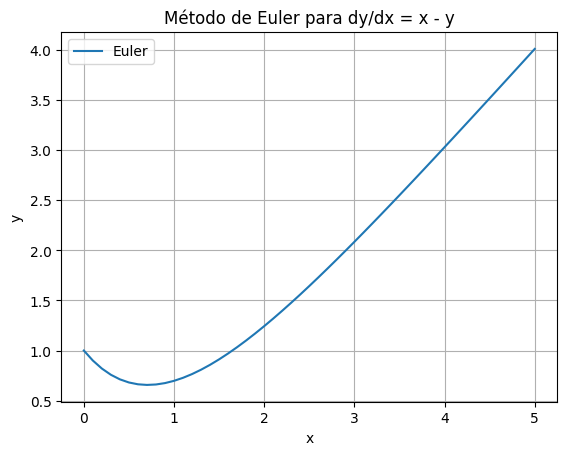

In [3]:
def f(x, y):
    return x - y

#Condiciones iniciales
x0 = 0
y0 = 1
#Tamaño de paso
h = 0.1
n = 50

x_vals = [x0]
y_vals = [y0]

#Metodo de Euler
for _ in range(n):
    y0 = y0 + h * f(x0, y0)
    x0 = x0 + h
    x_vals.append(x0)
    y_vals.append(y0)

plt.plot(x_vals, y_vals, label='Euler')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Método de Euler para dy/dx = x - y')
plt.grid(True)
plt.legend()
plt.show()


## Actividad 2

Resuelve con el método de Euler:

$$\frac{dy}{dx} = y(1 - y),\quad y(0) = 0.1$$

In [ ]:
# Tu código aquí:
# Modifica la función y parámetros para simular esta EDO con Euler


## Aplicación: Ley de enfriamiento de Newton


$$\frac{dT}{dt} = k(T - T_{ambiente})$$

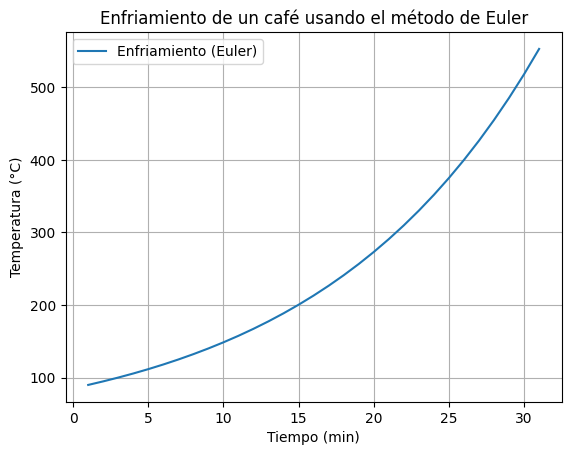

In [5]:
def newton_cooling(t, T, T_amb=20, k=0.07):
    return k * (T - T_amb)

#Condiciones iniciales
t0 = 1
T0 = 90

#Tamaño de paso
h = 1
n = 30

t_vals = [t0]
T_vals = [T0]

#Método de Euler
for _ in range(n):
    T0 = T0 + h * newton_cooling(t0, T0)
    t0 = t0 + h
    t_vals.append(t0)
    T_vals.append(T0)

plt.plot(t_vals, T_vals, label='Enfriamiento (Euler)')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
plt.title('Enfriamiento de un café usando el método de Euler')
plt.grid(True)
plt.legend()
plt.show()


##Campo de pendientes

$$
\frac{dy}{dx} = x - y
$$

El **campo de pendientes** representa en cada punto $(x, y)$ la pendiente de la solución $y(x)$, es decir, el valor de $\frac{dy}{dx}$.

Graficar el campo de pendientes ayuda a visualizar el comportamiento general de las soluciones sin necesidad de resolver la ecuación explícitamente.

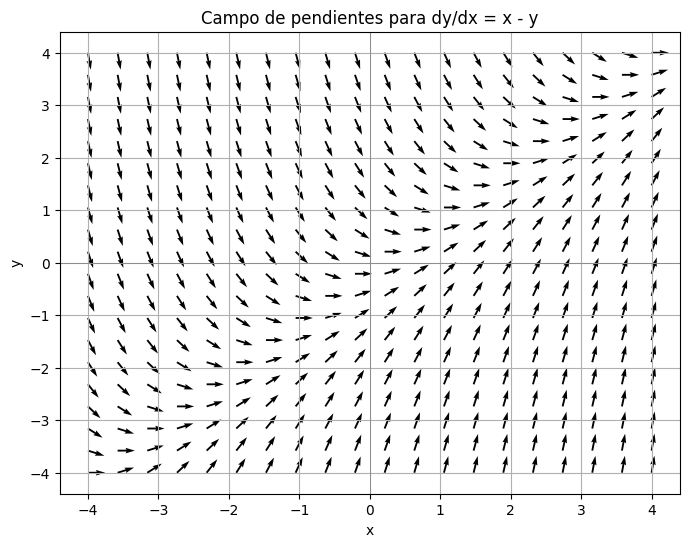

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función dy/dx = f(x, y)
def f(x, y):
    return x - y

# Crear malla de puntos (x, y)
x = np.linspace(-4, 4, 20)
y = np.linspace(-4, 4, 20)
X, Y = np.meshgrid(x, y)

# Calcular la pendiente en cada punto
U = 1  # dx constante para normalizar
V = f(X, Y)  # dy/dx en cada punto

# Normalizar los vectores (para graficar con dirección constante)
N = np.sqrt(U**2 + V**2)
U /= N
V /= N

# Graficar el campo de pendientes
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, angles="xy")
plt.title("Campo de pendientes para dy/dx = x - y")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.show()


### Actividad: Visualización de campos de pendientes

**Enunciado:**

Dada la ecuación diferencial ordinaria

$$
\frac{dy}{dx} = y \sin(x)
$$

1. Define la función que representa el campo de pendientes, es decir $f(x, y) = y \sin(x)$

2. Genera una malla de puntos $(x, y)$ en el rango $x \in [-2\pi, 2\pi]$ con $y \in [-3, 3]$

3. Grafica el campo de pendientes usando `matplotlib` y `numpy`.

4. *(Opcional)* Añade una o dos curvas aproximadas de soluciones numéricas usando el método de Euler para condiciones iniciales diferentes.


In [ ]:
# Tu código aquí:

## Proyecto final

Elige uno de los siguientes modelos y realiza una simulación numérica:

1. **Caída con fricción:** $\frac{dv}{dt} = g - kv$
2. **Interés compuesto continuo:** $\frac{dA}{dt} = rA$
3. **Desintegración radiactiva:** $\frac{dN}{dt} = -\lambda N$

Incluye:
- Simulación con Euler
- (Si es posible) solución con `SymPy`
- Gráfica comparativa